#### Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.
###### Always drop irrelevant columns,requires quite large sample sizes.
###### Logistic will give us binary output.It gives proab. of event occurrence.If the output is 0.65, we can say in terms of probability as:
“There is a 65 percent chance that your favorite cricket team is going to win today ”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
sns.set(style="ticks", color_codes=True)
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall)
#                                               against the false positive rate.
#It shows the tradeoff between sensitivity and specificity.AUC score 1 represents perfect classifier, 
#                                               and 0.5 represents a worthless classifier.

from sklearn.metrics import roc_auc_score   

from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

In [3]:
#  After taking into consideration all the parameters our classifier will predict the fetal state class code(NSP). 
# NSP has 3 classes namely N=normal; S=suspect; P=pathologic

### Cardiotocography (CTG) is a technical means of recording the fetal heartbeat and the uterine contractions during pregnancy. The machine used to perform the monitoring is called a cardiotocograph, more commonly known as an electronic fetal monitor (EFM).

In [4]:
data = pd.read_excel("G:\Python for Data Science and Machine Learning Bootcamp\Logistic_Data\CTG.xls", sheet_name='Raw Data')

In [5]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [6]:
data.drop(columns=['FileName', 'SegFile', 'Date']).head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [7]:
finaldata = data.drop(columns=['FileName', 'SegFile', 'Date']).dropna()

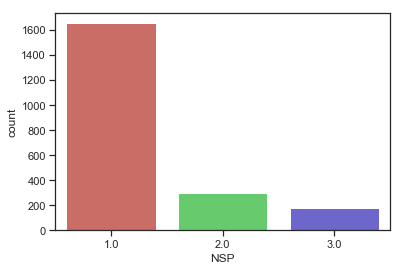

In [8]:
# Explore the target data and visualize it.
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')

In [9]:
finaldata.isnull().sum()

b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [10]:
finaldata.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [11]:
X = finaldata.drop('NSP' , axis = 1)
y = finaldata['NSP']

In [12]:
# we split 75% of the data to training set while 25% of the data to test set using below code.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

C:\Users\HIMESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HIMESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[407,   2,   1],
       [  9,  63,   0],
       [  0,   0,  50]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

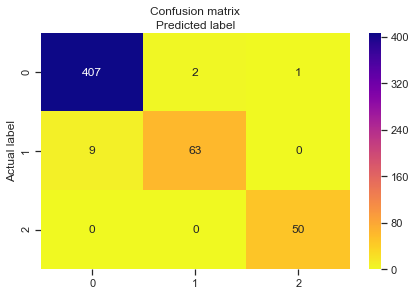

In [13]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="plasma_r",fmt='g' )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9774436090225563


In [15]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9645816533570587


In [16]:
count_Normal = len(finaldata[(finaldata['NSP']==1)])
count_Suspect = len(finaldata[(finaldata['NSP']==2)])
count_Pathogelic = len(finaldata[(finaldata['NSP']==3)])

In [17]:
perc_Normal =(count_Normal/(count_Normal + count_Pathogelic + count_Suspect))*100
perc_Normal

77.84571966133585

In [18]:
perc_Suspect =(count_Suspect/(count_Normal + count_Pathogelic + count_Suspect))*100
perc_Suspect

13.8758231420508

In [19]:
finaldata.groupby('NSP').mean()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
NSP,,,,,,,,,,,,,,,,,,,,,
1.0,952.833837,1781.982477,131.981873,131.981873,3.424169,6.370997,3.984290,42.465861,1.430634,5.044713,...,0.349849,0.032024,0.048943,0.001813,0.199396,0.137160,0.000000,0.000000,0.000000,3.387915
2.0,481.959322,1299.369492,141.684746,141.684746,0.213559,7.088136,2.077966,61.901695,0.638983,29.030508,...,0.000000,0.000000,0.000000,0.233898,0.006780,0.084746,0.000000,0.003390,0.664407,8.484746
3.0,843.437500,1635.352273,131.687500,131.687500,0.329545,15.681818,3.261364,64.539773,1.575568,22.846591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.607955,0.386364,0.005682,8.397727


### The  direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.


In [20]:
# data = pd.read_csv("G:/Python for Data Science and Machine Learning Bootcamp/Logistic_Data/bank.csv", header= 0)
# data

In [21]:
# data = data.dropna()
# print(data.shape)
# print(list(data.columns))

In [22]:
import talib